## Analize all levels of run T02

In [7]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import scipy.io as sio

In [8]:
idalia_land = '#8b7765'
def rotate(x_comp, y_comp, angle):
    '''Input:
        x_comp:: x component of vector
        y_comp:: y component of vector
       angle:: in radians.
       Returns:
       Rotated componets of vector x_rot and y_rot'''
    x_rot = x_comp*np.cos(angle)-(y_comp)*np.sin(angle)
    y_rot = x_comp*np.sin(angle)+(y_comp)*np.cos(angle)
    return(x_rot, y_rot)

def get_field(varname, filepath):
    '''
    file:: str, path to file
    name:: str, variable name (eg 'typevector_filtered', 'velocity_magnitude', 'x','y','u_filtered', 'v_filtered', etc.)
    '''
    mat = sio.loadmat(filepath, squeeze_me=True)
    var = mat[varname]
    return(var)

def get_mask(filepath, fr=0):
    '''Get the mask from a PIV mat file.'''
    mat = sio.loadmat(filepath, squeeze_me=True)
    mask_PIV = np.ma.masked_values(mat['typevector_filtered'][0],0)
    mask = np.ma.getmask(mask_PIV)
    return(mask)

def get_insert_bathy(angle, H = 0.092):
    ''' Get the bathymetry of the canyon insert and x,y coordinates rotated by an angle
    
    INPUT
    angle:: float, angle in radians, positive angle rotates counterclockwise
    H:: float, max depth of water column in meters
    
    RETURNS
    xIns_rot, yIns_rot, x and y coordinates rotated by angle (2D arrays)
    depth_ins, 2D array with depth values'''
    
    insert_file = '/ocean/kramosmu/Building_canyon/BuildCanyon/Bathymetry/tank/BathyInsert03.nc'
    H = 0.092 # m, max water level

    with Dataset(insert_file, 'r') as nbl:
        Xins = nbl.variables['X'][:]
        Yins = nbl.variables['Y'][:]
        depth_ins = (nbl.variables['Bathymetry'][:])-H

    xIns_rot = Xins*np.cos(angle)-(Yins)*np.sin(angle)
    yIns_rot = Xins*np.sin(angle)+(Yins)*np.cos(angle)
    return(xIns_rot, yIns_rot, depth_ins)
   

In [9]:
# Set file path and check size of arrays
filepath = '../exp_01aug19/frames/run01/T02_run01_PIV.mat'
mat = sio.loadmat(filepath, squeeze_me=True)
print(np.shape(mat['typevector_filtered'][1]))
print(np.shape(mat['typevector_filtered']))

(61, 58)
(601,)


In [10]:
# get full variables shape is (fr,y,x)

mask = get_mask(filepath) # (y,x)
angle = 48.5*np.pi/180

x_orig = get_field('x', filepath) #(fr,y,x)
y_orig = -get_field('y', filepath)
x,y = rotate(x_orig, y_orig, angle)

u_orig = get_field('u_filtered', filepath) #(fr,y,x)
v_orig = -get_field('v_filtered', filepath)
u,v = rotate(u_orig, v_orig, angle)

spd = get_field('velocity_magnitude', filepath) #(fr,y,x)

(20, 37)

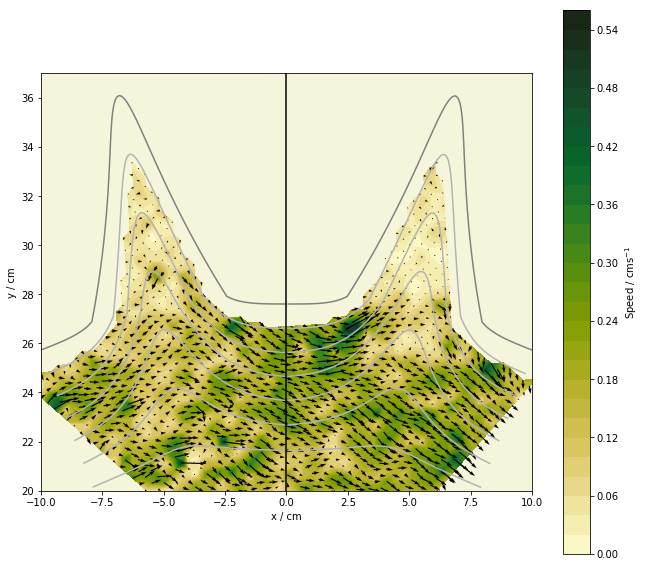

In [174]:
fig,ax = plt.subplots(1, 1, figsize=(11,10))
ax.set_facecolor('beige')
fr = 50
angle1 = 68.5*np.pi/180
angle2 = 90.0*np.pi/180

x_ma = 100*np.ma.masked_array(x[fr], mask=mask)
y_ma = 100*np.ma.masked_array(y[fr], mask=mask)
u_ma = 100*np.ma.masked_array(u[fr], mask=mask)
v_ma = 100*np.ma.masked_array(v[fr], mask=mask)
spd_ma =100* np.ma.masked_array(spd[fr],mask=mask)

cf = ax.contourf(x_ma-24.2,y_ma+21.,spd_ma,30,
                cmap=cmo.cm.speed) # pcolormesh does not work with masked arrays
cb = plt.colorbar(cf)
cb.set_label('Speed / cms$^{-1}$')

qv = ax.quiver(x_ma-24.2,y_ma+21.0,u_ma,v_ma, color='k', scale=10)


x_ins, y_ins, depth_ins = get_insert_bathy(angle1)
x_ins2, y_ins2, depth_ins2 = get_insert_bathy(angle2)

cnt1 = ax.contour(x_ins*100,y_ins*100,-depth_ins*100,
                 levels=[2.8,3.8,4.8,5.8,6.8,7.8,8.8], colors=['0.5','0.7','0.7','0.7','0.7','0.7','0.7'])
cnt2 = ax.contour(x_ins2*100,y_ins2*100,-depth_ins2*100,
                 levels=[2.8,3.8,4.8,5.8,6.8,7.8,8.8], colors=['0.5','0.7','0.7','0.7','0.7','0.7','0.7'])


ax.set_ylabel('y / cm')
ax.set_xlabel('x / cm')

ax.axvline(0, color='k')
ax.set_aspect(1)
ax.set_xlim(-10,10)
ax.set_ylim(20,37)

(20, 37)

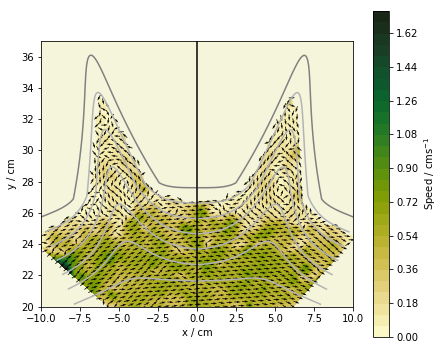

In [194]:
# normalized quiver
fig,ax = plt.subplots(1, 1, figsize=(7,6))
ax.set_facecolor('beige')
fr = 200
angle1 = 68.5*np.pi/180
angle2 = 90.0*np.pi/180

x_ma = 100*np.ma.masked_array(x[fr], mask=mask)
y_ma = 100*np.ma.masked_array(y[fr], mask=mask)
u_ma = 100*np.ma.masked_array(u[fr], mask=mask)
v_ma = 100*np.ma.masked_array(v[fr], mask=mask)
spd_ma =100* np.ma.masked_array(spd[fr],mask=mask)

U = u_ma / np.sqrt(u_ma**2 + v_ma**2);
V = v_ma / np.sqrt(u_ma**2 + v_ma**2);

cf = ax.contourf(x_ma-24.2,y_ma+21.,spd_ma,30,
                cmap=cmo.cm.speed) # pcolormesh does not work with masked arrays
cb = plt.colorbar(cf)
cb.set_label('Speed / cms$^{-1}$')

qv = ax.quiver(x_ma-24.2,y_ma+21.0,U,V,scale=50, color='k', units='width',pivot='middle')

x_ins, y_ins, depth_ins = get_insert_bathy(angle1)
x_ins2, y_ins2, depth_ins2 = get_insert_bathy(angle2)

cnt1 = ax.contour(x_ins*100,y_ins*100,-depth_ins*100,
                 levels=[2.8,3.8,4.8,5.8,6.8,7.8,8.8], colors=['0.5','0.7','0.7','0.7','0.7','0.7','0.7'])
cnt2 = ax.contour(x_ins2*100,y_ins2*100,-depth_ins2*100,
                 levels=[2.8,3.8,4.8,5.8,6.8,7.8,8.8], colors=['0.5','0.7','0.7','0.7','0.7','0.7','0.7'])


ax.set_ylabel('y / cm')
ax.set_xlabel('x / cm')

ax.axvline(0, color='k')
ax.set_aspect(1)
ax.set_xlim(-10,10)
ax.set_ylim(20,37)

/home/kramosmu/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0,1.1,'Time 40.0 s')

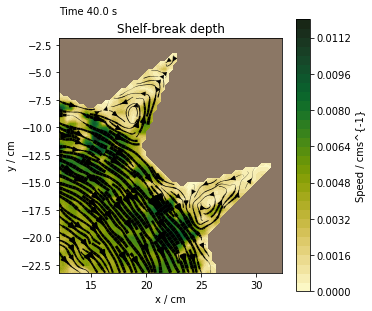

In [18]:
# stream plots
fr=200#
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_facecolor(idalia_land)

xmean = (x_orig[fr])[1,:]
ymean = (y_orig[fr])[:,1]
#spdmean = np.ma.masked_array(np.nanmean(spd[fr], axis=0), mask=mask)
spdmean = np.empty((2, np.shape(x_orig[fr])[0],np.shape(x_orig[fr])[1] ))

for ii in range(2):
    spdmean[ii,:,:] = spd[fr+ii]

spd_mean = np.ma.masked_array(np.nanmean(spdmean, axis=0), mask=mask)
umean = np.ma.masked_array(u_orig[fr], mask=mask)
vmean = np.ma.masked_array(v_orig[fr], mask=mask)

cf = ax1.contourf(100*xmean,100*ymean,spd_mean,30,cmap=cmo.cm.speed)
cb = plt.colorbar(cf)
cb.set_label(r'Speed / cms^{-1}')
ax1.streamplot(100*xmean,100*ymean,100*umean,100*vmean, density=2,
               linewidth=500*np.ma.masked_array(spd[fr], mask=mask), color='k')
ax1.set_aspect(1)

ax1.set_ylabel('y / cm')
ax1.set_xlabel('x / cm')
ax1.set_title('Shelf-break depth')
ax1.text(0.0,1.1,'Time %1.1f s' %(fr/5), transform=ax1.transAxes)
    

(60, 52)

In [217]:
np.shape(np.nanmean(u_orig[fr:fr+10]))

(60, 52)